# COVID Government Response Paper Data Analysis

# TO DO:


- [ ] Need to explore the missingness of the Oxford data. Sort the countries by GDP and examine what the missingness matrix looks like. **If you could run imputation on this data then you would have a major leg up on the other paper working on the similar topic. (on to of the other benefits to your paper)**
- [ ] Continue to update this **[file](https://1drv.ms/x/s!AjWX5HOdYY23kf9x5S7g8LKLGlseVg?e=992nsi)** of data source locations 
- [ ] 
- [ ] 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =10 ,6
import numpy as np
import seaborn as sns
import datetime
from matplotlib.pyplot import figure
import os
from pathlib import Path
import shutil
import missingno as msno

In [2]:
data_path = '..\Modified Data Sets'
control_data_path = '..\Control Data'
graphics_path = '..\graphics'

In [35]:
df = pd.read_excel(f'{data_path}\Final COVID Data Set (Through 2020-09-29).xlsx')
df_NEW = pd.read_excel(f'{data_path}\\NEW CONTROLS Final COVID Data Set (Through 2020-09-29).xlsx')

In [83]:
df = df.loc[~df.case_count.isnull()].copy()
df['dup'] = df.duplicated(['country'],keep='last')

df_NEW = df_NEW.loc[~df_NEW.case_count.isnull()].copy()
df_NEW['dup'] = df_NEW.duplicated(['country'],keep='last')

In [84]:
df.columns

Index(['date', 'country', 'case_count', 'death_count', 'school_close',
       'work_close', 'public_events', 'large_gather', 'public_transpo',
       'stay_home', 'domestic_travel', 'internat_travel', 'population',
       'ages_65_and_above_of_total_population', 'female_of_total',
       'diabetes_prevalence_of_population_ages_20_to_79',
       'obese_of_adult_population', 'htn_prevalence',
       'smoking_prevalence_ages_15', 'cancer_prevalence_',
       'hiv_prevalence_of_population_ages_1549', 'copd_dalys_per_100000',
       'sars_experience_0_no_1_yes', 'quarantine_efficiency', 'gov_efficiency',
       'monitoring_and_detection', 'healthcare_readiness',
       'country_vulnerability', 'emergency_preparedness', 'total_score',
       'countrycode', 'gdp_rank', 'gdp_in_mil_us', 'dup'],
      dtype='object')

In [85]:
miss_anal = df.loc[~df.dup]
miss_anal = miss_anal.loc[~miss_anal.quarantine_efficiency.isnull()]
miss_anal_NEW = df_NEW.loc[~df_NEW.dup]

In [120]:
miss_anal_NEW = miss_anal_NEW.loc[~miss_anal_NEW['quarantine efficiency'].isnull()]

In [121]:
miss_anal.shape, miss_anal_NEW.shape

((182, 34), (182, 38))

In [87]:
miss_anal.case_count

251       21.0
524      127.0
797      155.0
1070       0.0
1343     108.0
         ...  
49643      0.0
49895      0.0
50168     55.0
50441     21.0
50714      0.0
Name: case_count, Length: 188, dtype: float64

In [88]:
df_indexed = df.set_index('date')
# df_indexed.case_count.fillna()

In [7]:
df_indexed.columns

Index(['country', 'case_count', 'death_count', 'school_close', 'work_close',
       'public_events', 'large_gather', 'public_transpo', 'stay_home',
       'domestic_travel', 'internat_travel', 'population',
       'ages_65_and_above_of_total_population', 'female_of_total',
       'diabetes_prevalence_of_population_ages_20_to_79',
       'obese_of_adult_population', 'htn_prevalence',
       'smoking_prevalence_ages_15', 'cancer_prevalence_',
       'hiv_prevalence_of_population_ages_1549', 'copd_dalys_per_100000',
       'sars_experience_0_no_1_yes', 'quarantine_efficiency', 'gov_efficiency',
       'monitoring_and_detection', 'healthcare_readiness',
       'country_vulnerability', 'emergency_preparedness', 'total_score',
       'countrycode', 'gdp_rank', 'gdp_in_mil_us'],
      dtype='object')

> ### Evaluating Stationality

In [18]:
# from statsmodels.tsa.stattools import adfuller
# dftest = adfuller(df_indexed.case_count,autolag='AIC')
# dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'n'])
# for key,value in dftest[4].items():
#     dfoutput[f'Critical Value ({key})']= value
# print(dfoutput)

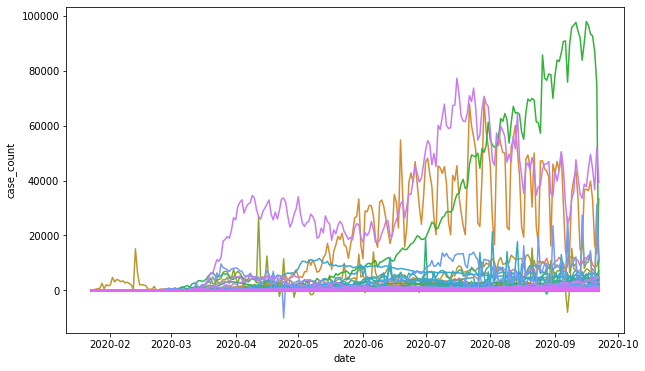

In [8]:
sns.lineplot(x = 'date', y ='case_count', hue = 'country', data = df,legend=False)

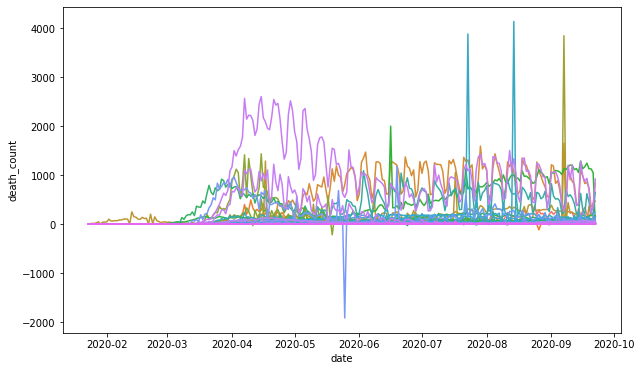

In [9]:
sns.lineplot(x = 'date', y ='death_count', hue = 'country', data = df,legend=False)

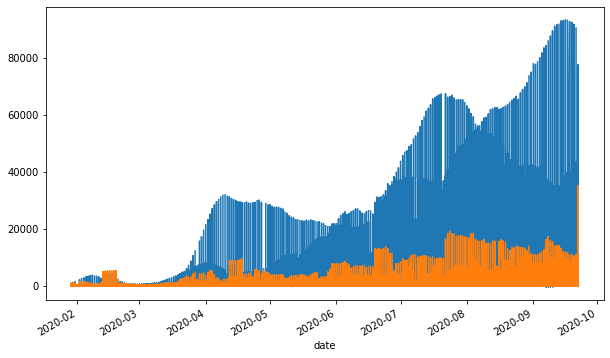

In [13]:
rolmean = df_indexed.case_count.rolling(window=7).mean()

rolstd = df_indexed.case_count.rolling(window=7).std()
rolmean.plot()
rolstd.plot()

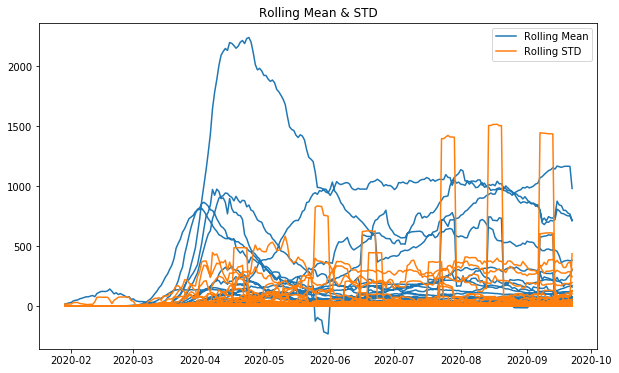

In [12]:
rolmean = df_indexed.death_count.rolling(window=7).mean()

rolstd = df_indexed.death_count.rolling(window=7).std()
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label='Rolling STD')

# death = plt.plot(df_indexed.death_count, label = 'Death Counts')
plt.legend(loc='best')
plt.title('Rolling Mean & STD')
# rolstd.plot()
plt.show()

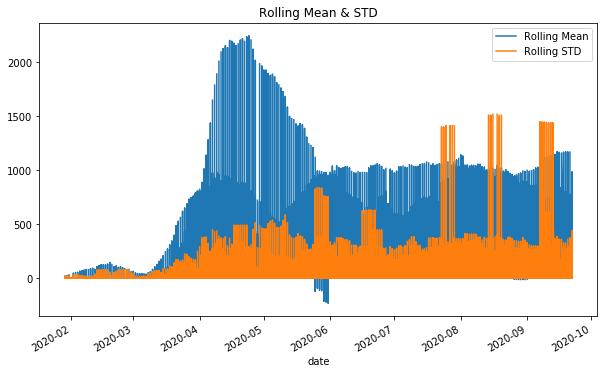

In [36]:
rolmean = df_indexed.death_count.rolling(window=7).mean()

rolstd = df_indexed.death_count.rolling(window=7).std()
rolmean.plot( label='Rolling Mean')
rolstd.plot( label='Rolling STD')

# death = plt.plot(df_indexed.death_count, label = 'Death Counts')
plt.legend(loc='best')
plt.title('Rolling Mean & STD')
# rolstd.plot()
plt.show()

### Missingness Analysis

In [89]:
df_nomiss_NEW.country

48462                          united states
10031                                  china
24094                                  japan
18144                                germany
21910                                  india
                        ...                 
58255                          french guiana
58256                        northern cyprus
58257    french southern and antarctic lands
58258              saint pierre and miquelon
58259                             somaliland
Name: country, Length: 269, dtype: object

>> ##### Missingness Sorted by GDP Rank

### DF with Control Vars from Our World In Data

>>> df Without Missing Data Removed

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


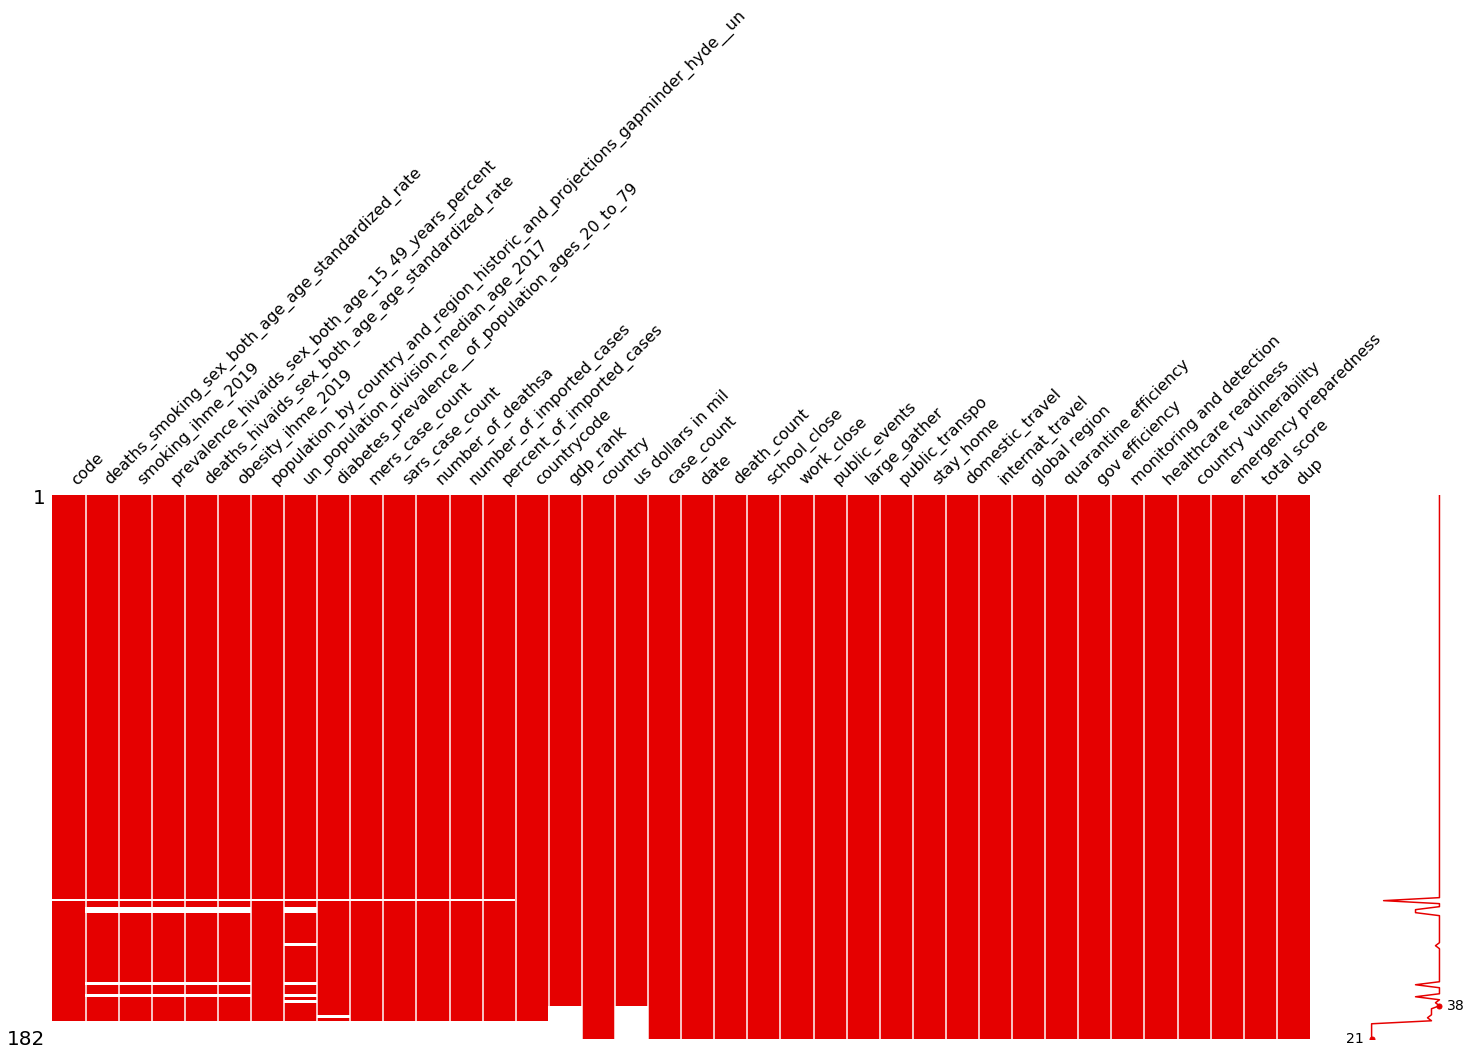

In [122]:
miss_anal_NEW.sort_values(by='gdp_rank',inplace=True)
df_nomiss_NEW = miss_anal_NEW.copy()
msno.matrix(df_nomiss_NEW, color=(0.90, 0.00, 0.00))

>>> df with nearly complete data

In [92]:
df_nomiss_NEW.shape

(188, 38)

In [93]:
df_nomiss_NEW_cc = miss_anal_NEW.loc[~miss_anal_NEW.school_close.isnull()].copy()

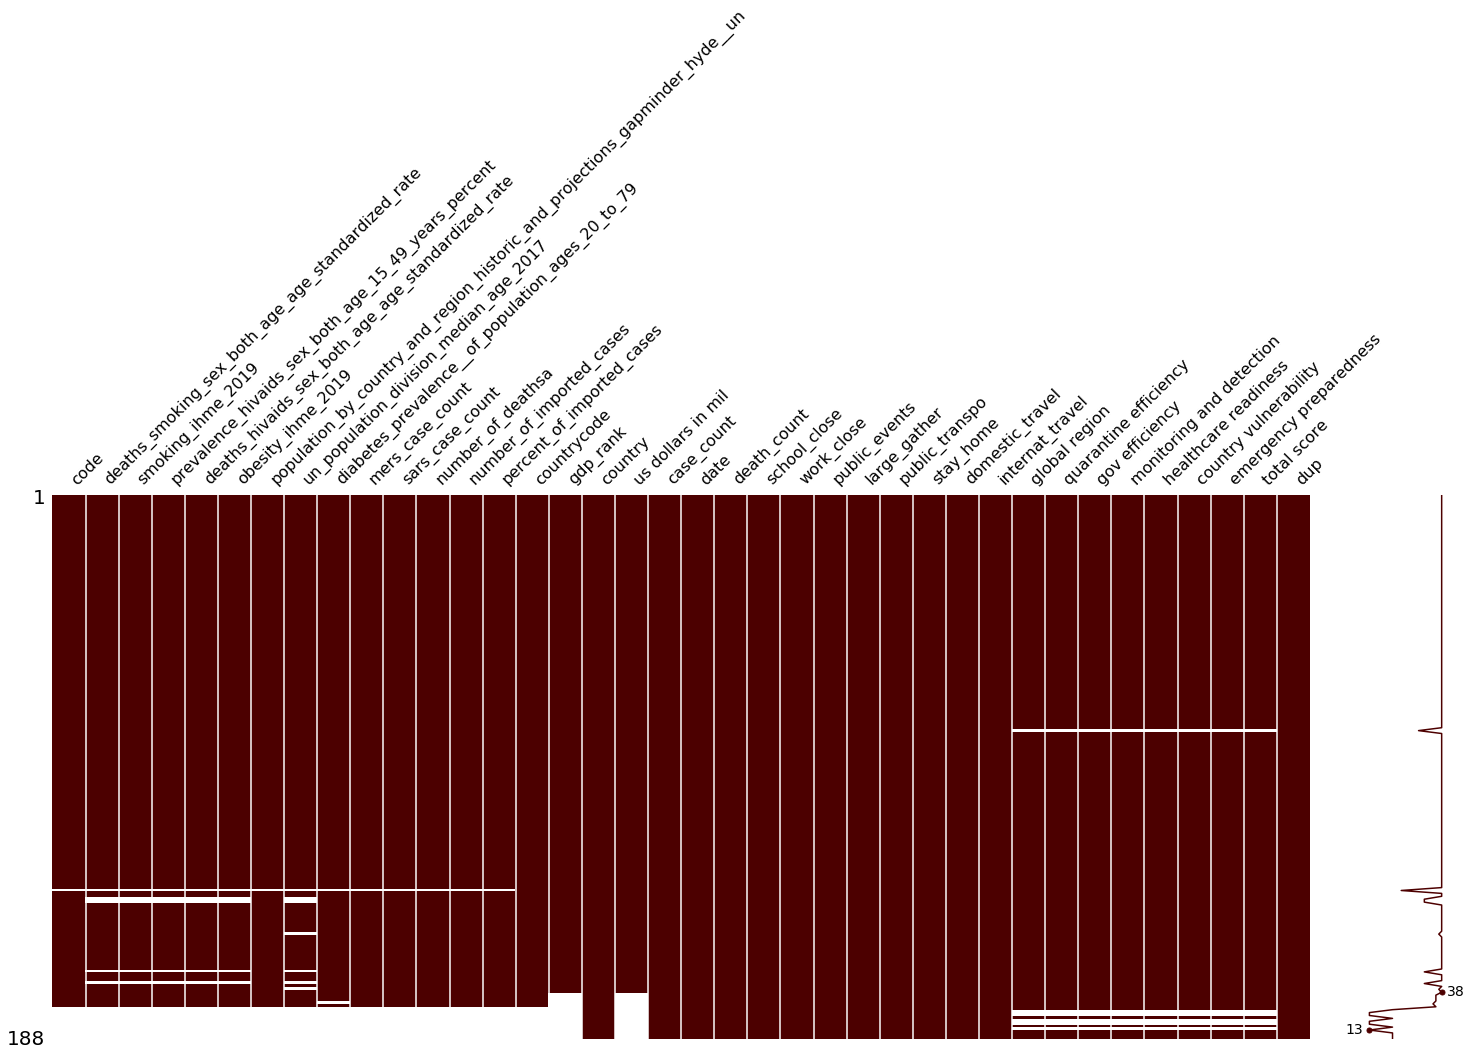

In [95]:
df_nomiss_NEW_cc.sort_values(by='gdp_rank',inplace=True)
msno.matrix(df_nomiss_NEW_cc, color=(0.30, 0.00, 0.00))

## Original Control Variable Data

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


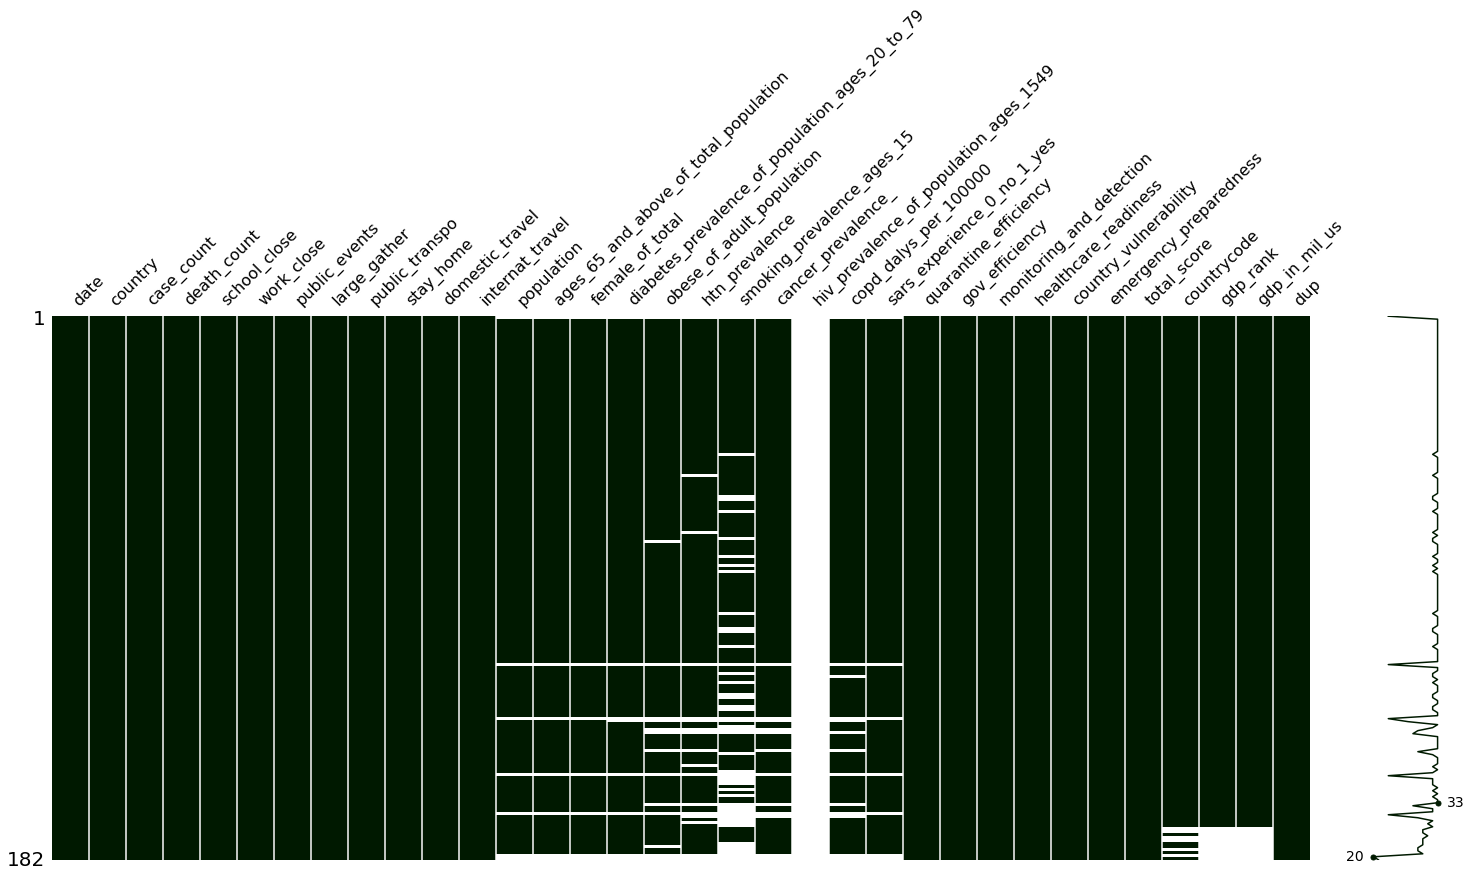

In [123]:
miss_anal.sort_values(by='gdp_rank',inplace=True)
df_nomiss = miss_anal.loc[~miss_anal.case_count.isnull()].copy()
msno.matrix(df_nomiss, color=(0.0, 0.10, 0.00))

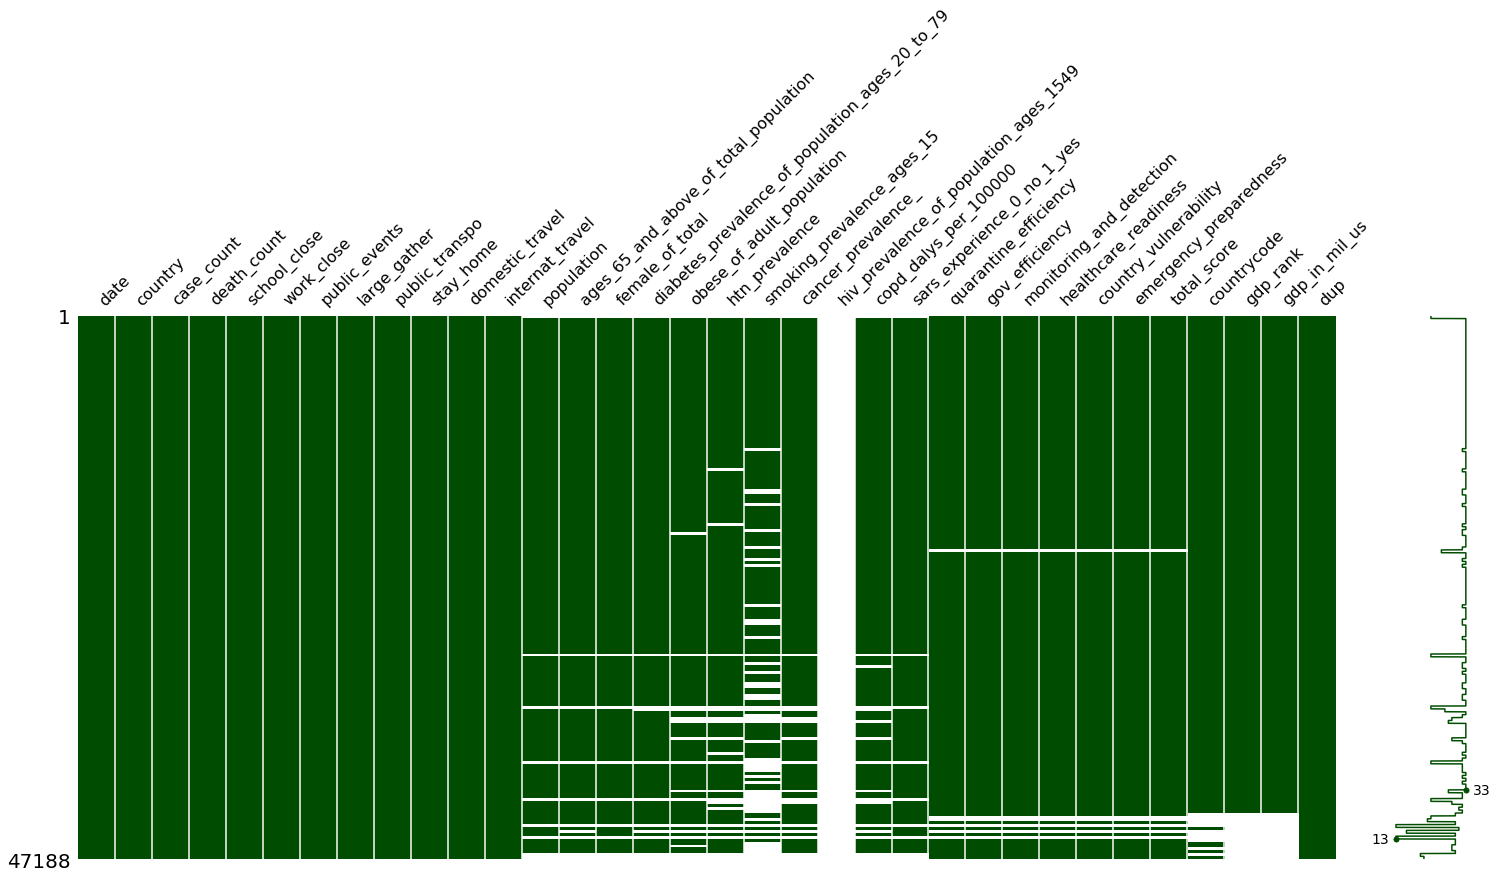

In [99]:
df_nomiss_cc = df_nomiss.loc[~df_nomiss.school_close.isnull()].copy()
msno.matrix(df_nomiss_cc, color=(0.0, 0.30, 0.00))


>> ##### Missingness Sorted by Population

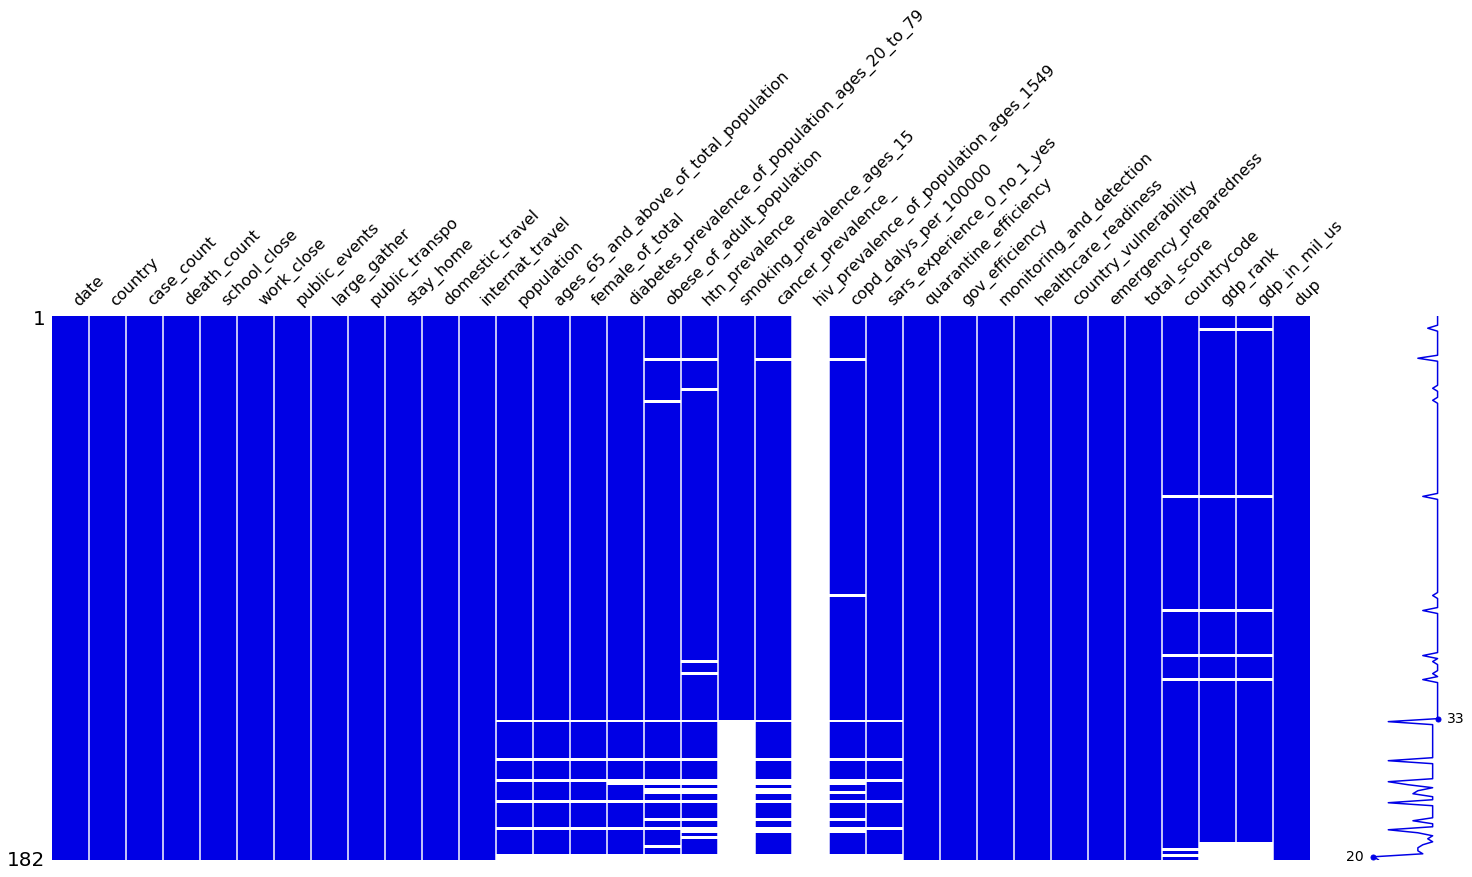

In [124]:
df_nomiss.sort_values(by='smoking_prevalence_ages_15',inplace=True)
msno.matrix(df_nomiss, color=(0.0, 0.00, 0.90))

In [128]:
df_nomiss.columns

Index(['date', 'country', 'case_count', 'death_count', 'school_close',
       'work_close', 'public_events', 'large_gather', 'public_transpo',
       'stay_home', 'domestic_travel', 'internat_travel', 'population',
       'ages_65_and_above_of_total_population', 'female_of_total',
       'diabetes_prevalence_of_population_ages_20_to_79',
       'obese_of_adult_population', 'htn_prevalence',
       'smoking_prevalence_ages_15', 'cancer_prevalence_',
       'hiv_prevalence_of_population_ages_1549', 'copd_dalys_per_100000',
       'sars_experience_0_no_1_yes', 'quarantine_efficiency', 'gov_efficiency',
       'monitoring_and_detection', 'healthcare_readiness',
       'country_vulnerability', 'emergency_preparedness', 'total_score',
       'countrycode', 'gdp_rank', 'gdp_in_mil_us', 'dup'],
      dtype='object')

In [127]:
df_nomiss_NEW.columns

Index(['code', 'deaths_smoking_sex_both_age_age_standardized_rate',
       'smoking_ihme_2019',
       'prevalence_hivaids_sex_both_age_15_49_years_percent',
       'deaths_hivaids_sex_both_age_age_standardized_rate',
       'obesity_ihme_2019',
       'population_by_country_and_region_historic_and_projections_gapminder_hyde__un',
       'un_population_division_median_age_2017',
       'diabetes_prevalence__of_population_ages_20_to_79', 'mers_case_count',
       'sars_case_count', 'number_of_deathsa', 'number_of_imported_cases',
       'percent_of_imported_cases', 'countrycode', 'gdp_rank', 'country',
       'us dollars in mil', 'case_count', 'date', 'death_count',
       'school_close', 'work_close', 'public_events', 'large_gather',
       'public_transpo', 'stay_home', 'domestic_travel', 'internat_travel',
       'global region', 'quarantine efficiency', 'gov efficiency',
       'monitoring and detection', 'healthcare readiness',
       'country vulnerability', 'emergency preparednes

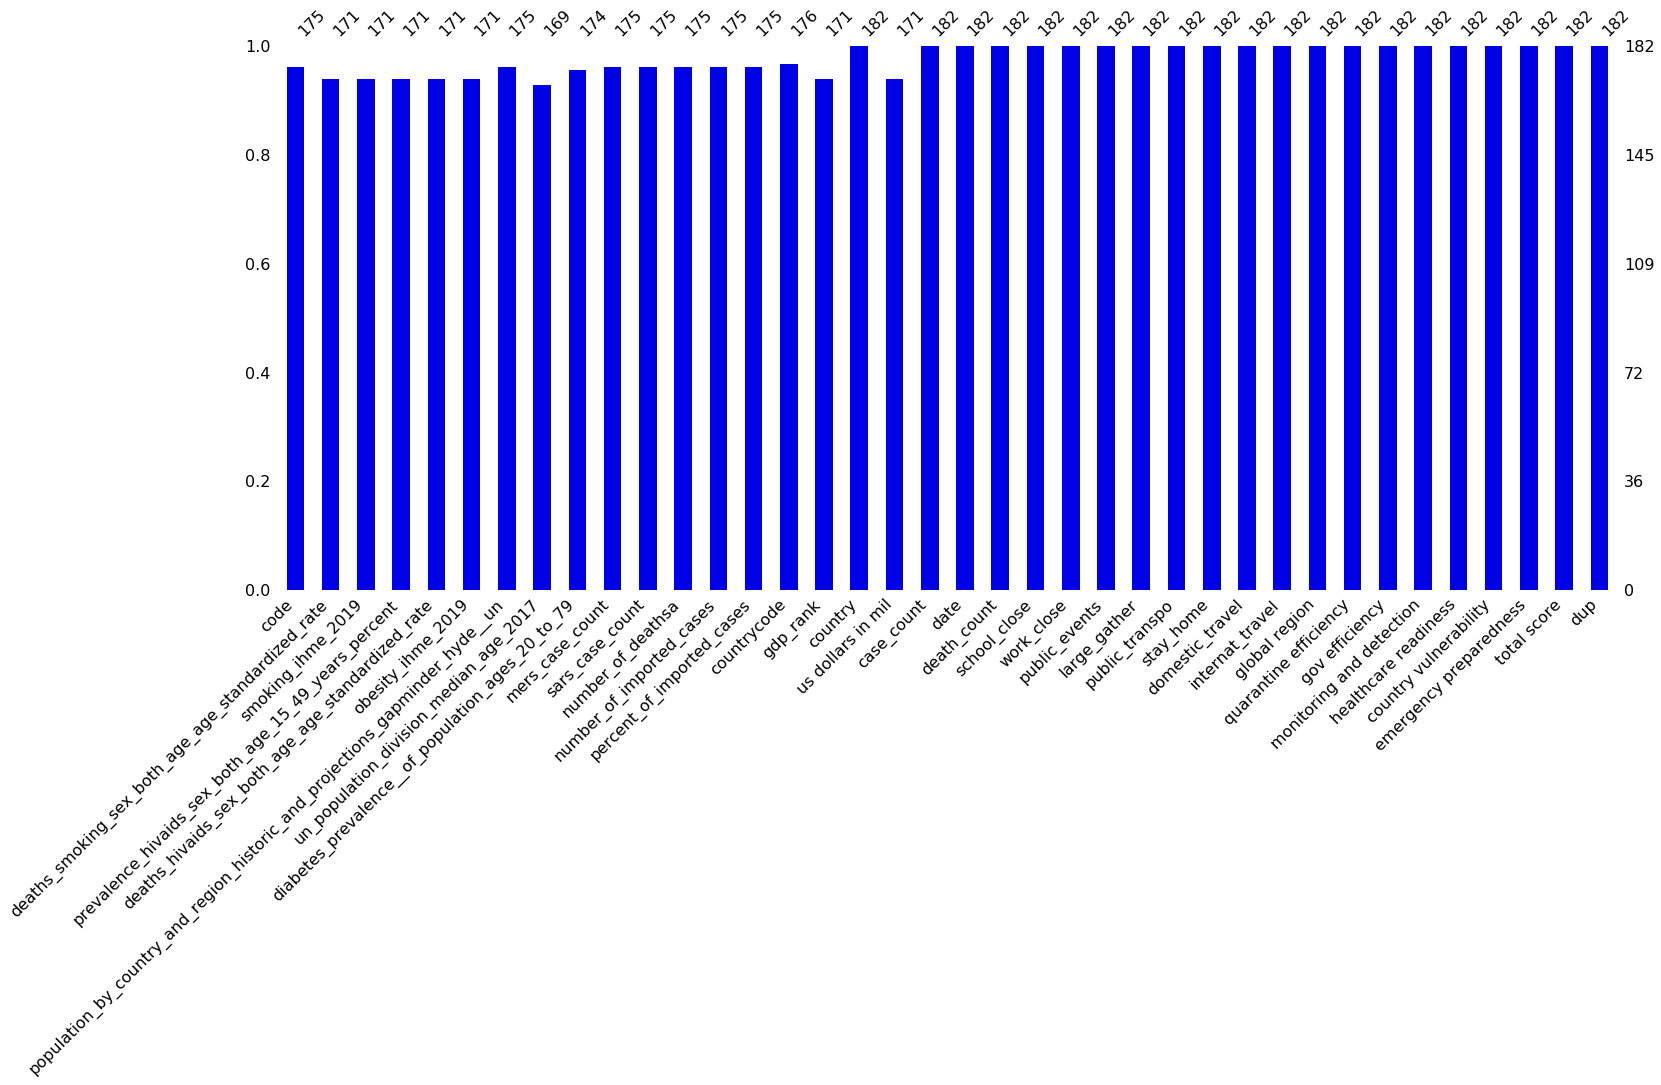

In [125]:
msno.bar(df_nomiss_NEW, color=(0.0, 0.00, 0.90))

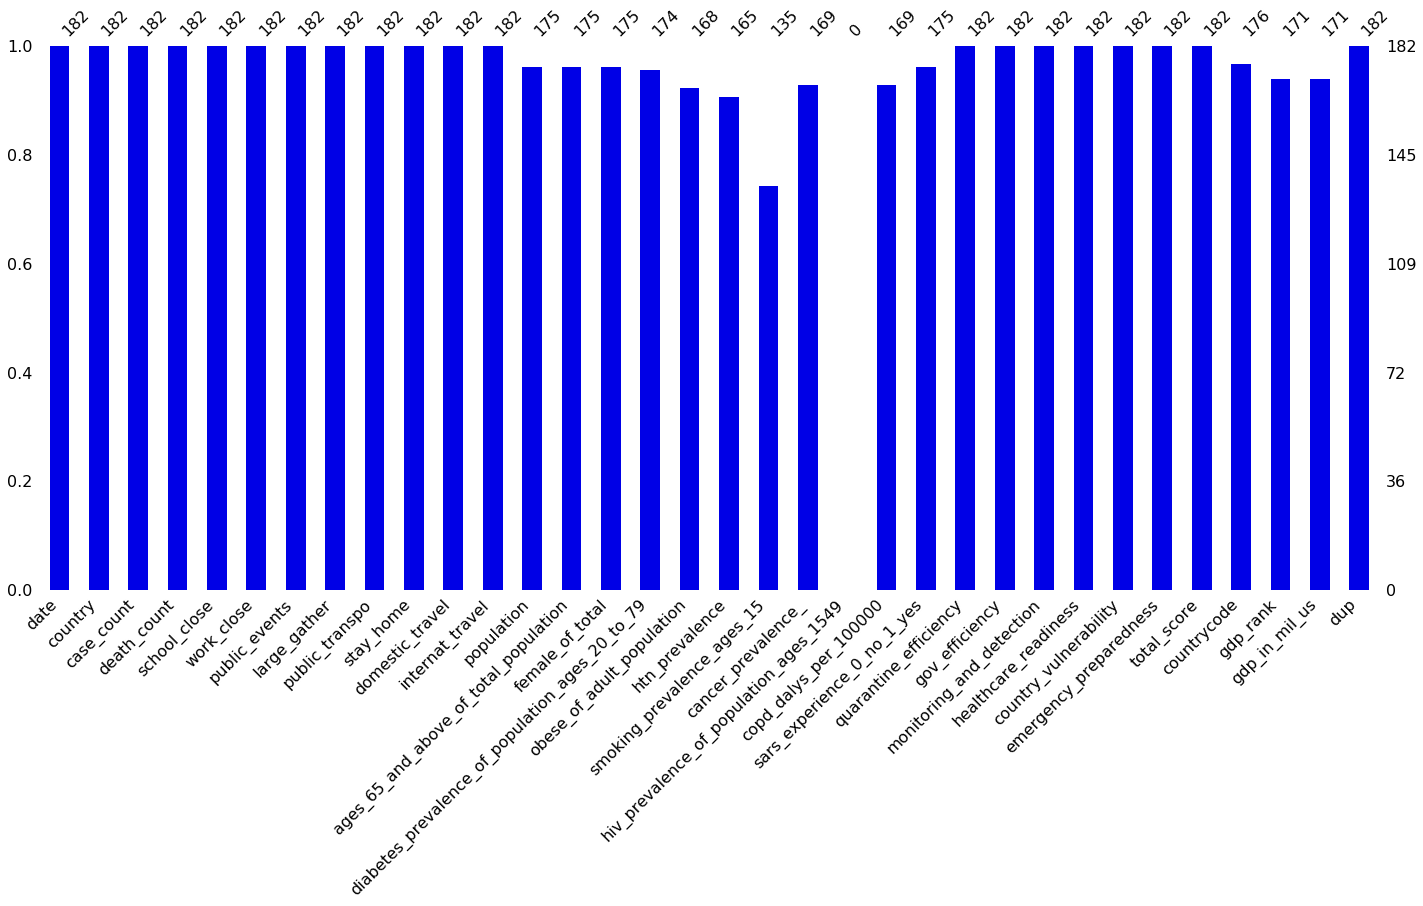

In [126]:
msno.bar(df_nomiss, color=(0.0, 0.00, 0.90))

In [62]:
df.columns

Index(['date', 'country', 'case_count', 'death_count', 'school_close',
       'work_close', 'public_events', 'large_gather', 'public_transpo',
       'stay_home', 'domestic_travel', 'internat_travel', 'population',
       'ages_65_and_above_of_total_population', 'female_of_total',
       'diabetes_prevalence_of_population_ages_20_to_79',
       'obese_of_adult_population', 'htn_prevalence',
       'smoking_prevalence_ages_15', 'cancer_prevalence_',
       'hiv_prevalence_of_population_ages_1549', 'copd_dalys_per_100000',
       'sars_experience_0_no_1_yes', 'quarantine_efficiency', 'gov_efficiency',
       'monitoring_and_detection', 'healthcare_readiness',
       'country_vulnerability', 'emergency_preparedness', 'total_score',
       'countrycode', 'gdp_rank', 'gdp_in_mil_us'],
      dtype='object')

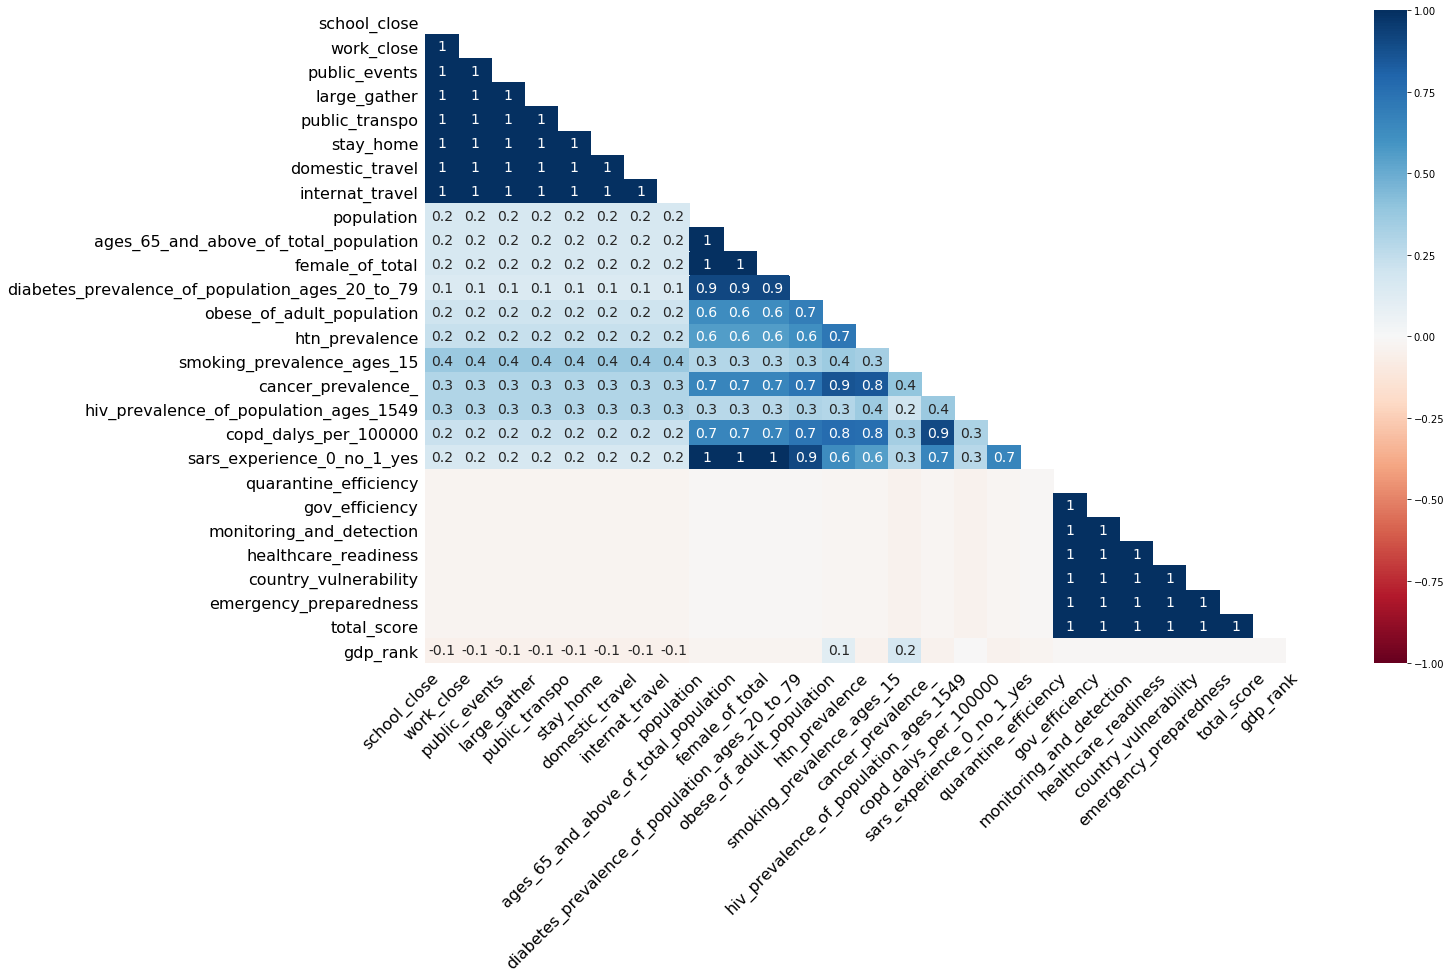

In [64]:
msno.heatmap(df_nomiss)

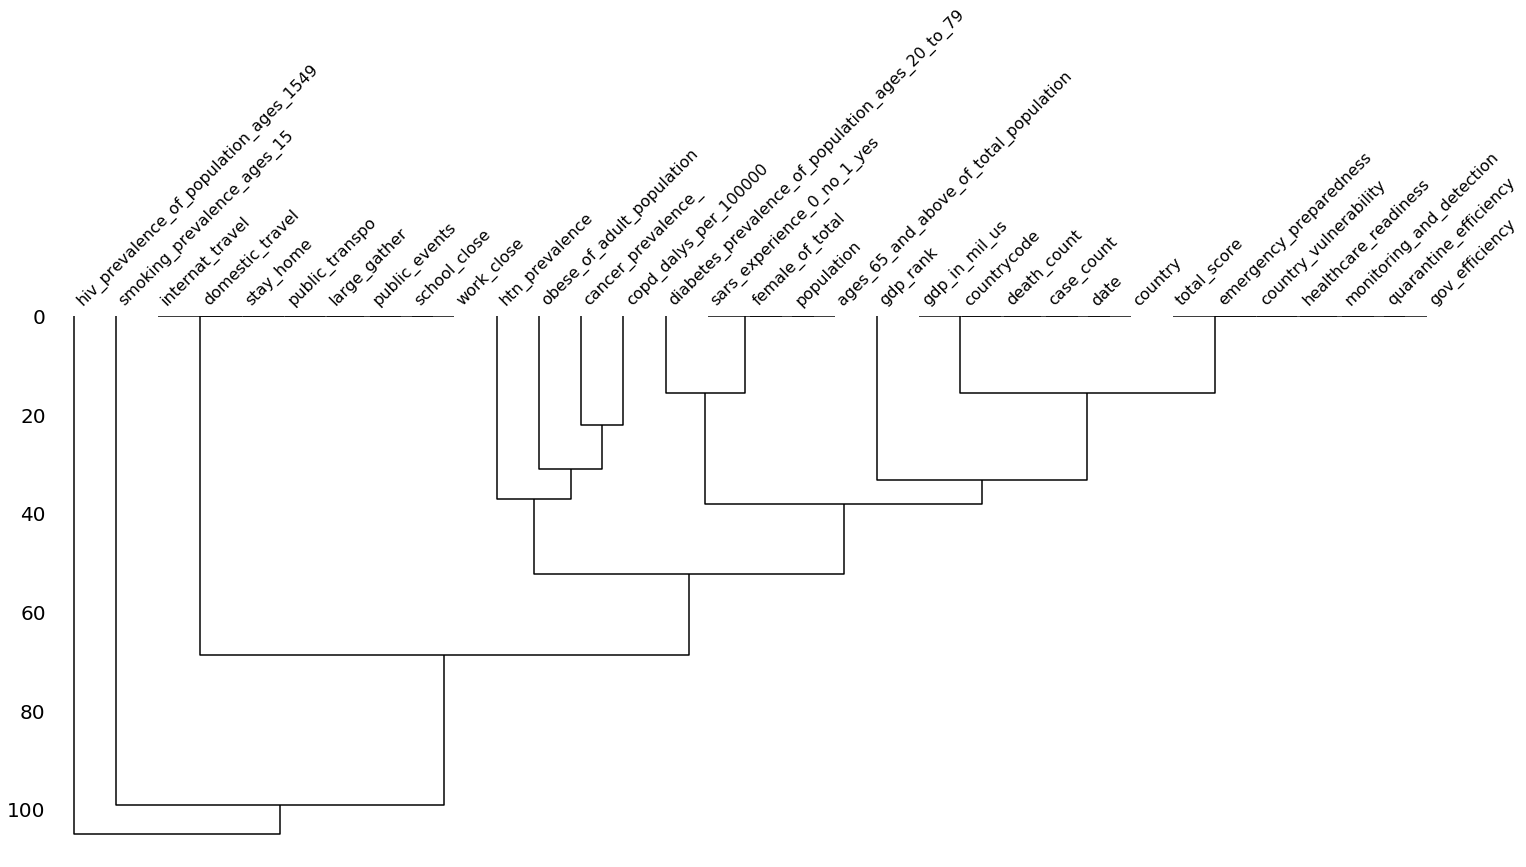

In [81]:
msno.dendrogram(df_nomiss)

In [8]:
msno.dendrogram(df_nomiss_NEW)

NameError: name 'df_nomiss_NEW' is not defined

>### Distribution Analysis

# Modeling Analysis

>> Model specification

\begin{equation}
\tag{2.13}
stack.loss_i = \alpha_n + \beta air_i + e_i, \text{ where } e_i \sim \text{N}(0,\sigma^2) 
\end{equation}

\begin{equation}
\tag{2.7}
\begin{bmatrix}stack.loss_1\\stack.loss_2\\stack.loss_3\\stack.loss_4\end{bmatrix}
= 
\begin{bmatrix}
\alpha&\beta&0&0&0\\
\alpha&0&\beta&0&0\\
\alpha&0&0&\beta&0\\
\alpha&0&0&0&\beta
\end{bmatrix}
\begin{bmatrix}1\\air_1\\air_2\\air_3\\air_4\end{bmatrix}
+
\begin{bmatrix}e_1\\e_2\\e_3\\e_4\end{bmatrix}
\end{equation}

\[\begin{equation}\tag{2.7}\begin{bmatrix}stack.loss_1\\stack.loss_2\\stack.loss_3\\stack.loss_4\end{bmatrix}=\begin{bmatrix}\alpha&\beta&0&0&0\\ \alpha&0&\beta&0&0\\ \alpha&0&0&\beta&0\\ \alpha&0&0&0&\beta\end{bmatrix}
\end{equation}]